# Motivation for Reversible Layers: Memory!

#### Reformer uses locality-sensitive-hashing (LSH) to reduce the complexity of attending over long sequences and reversible residual layers to more efficiently use the memory available.

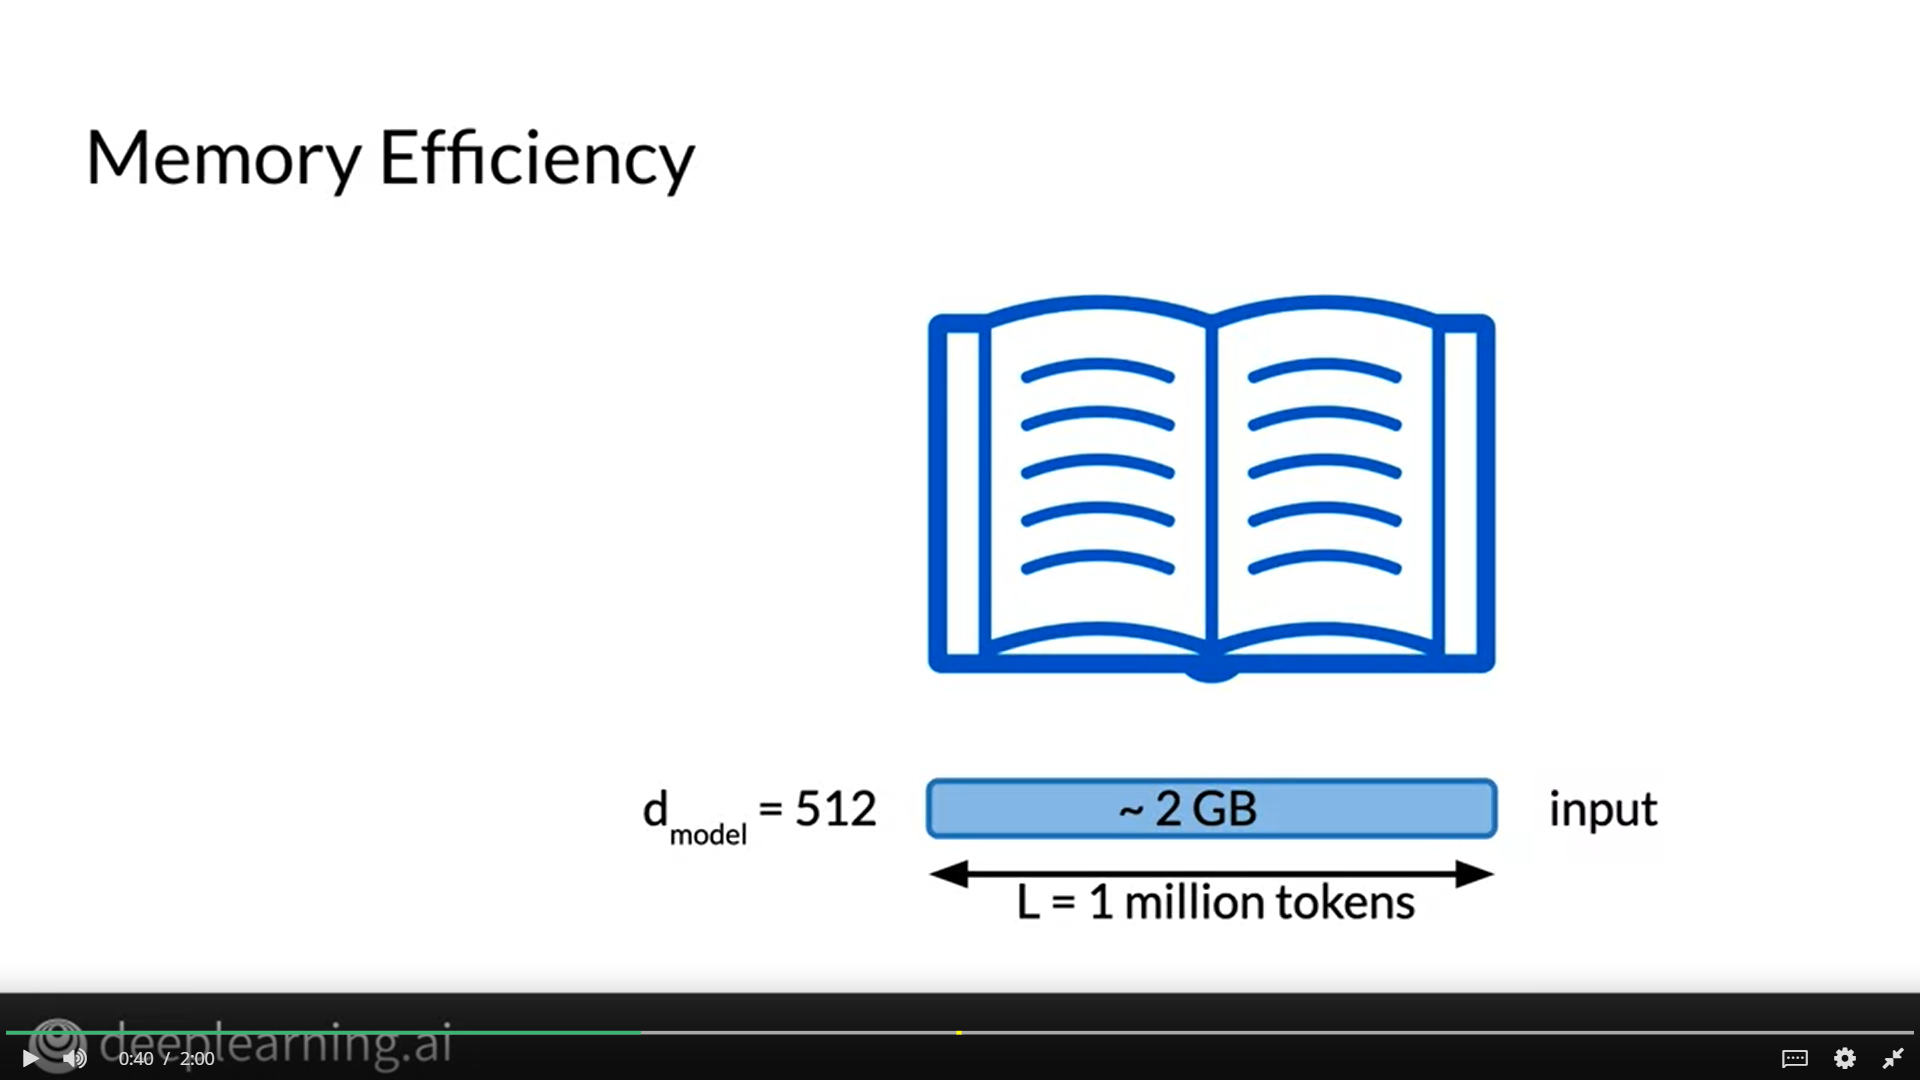

And each of these tokens will have an associated feature vector of some size, for example, 512. This means that just the input for the model is already 2GB in size. On a 16 gigabyte GPU, this is one-eight of your total memory budget, and you haven't even touched the layers yet.

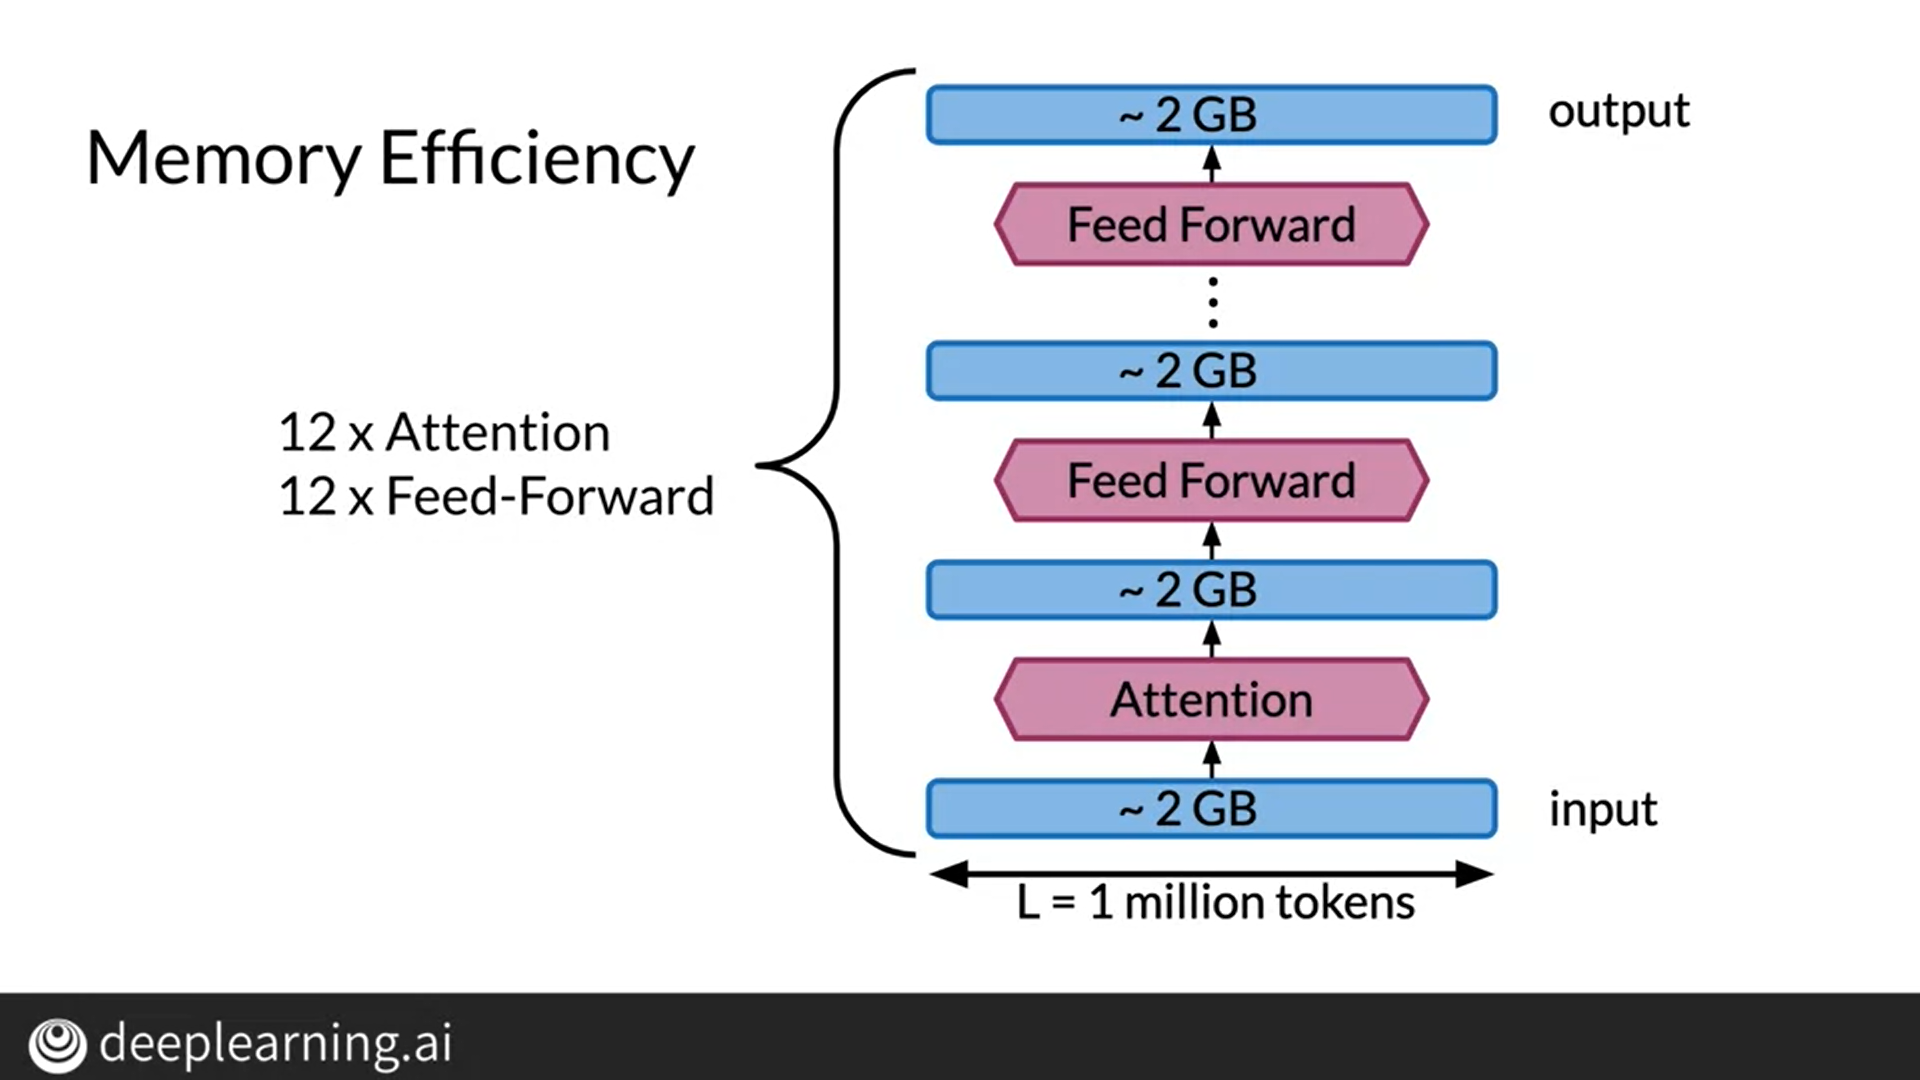

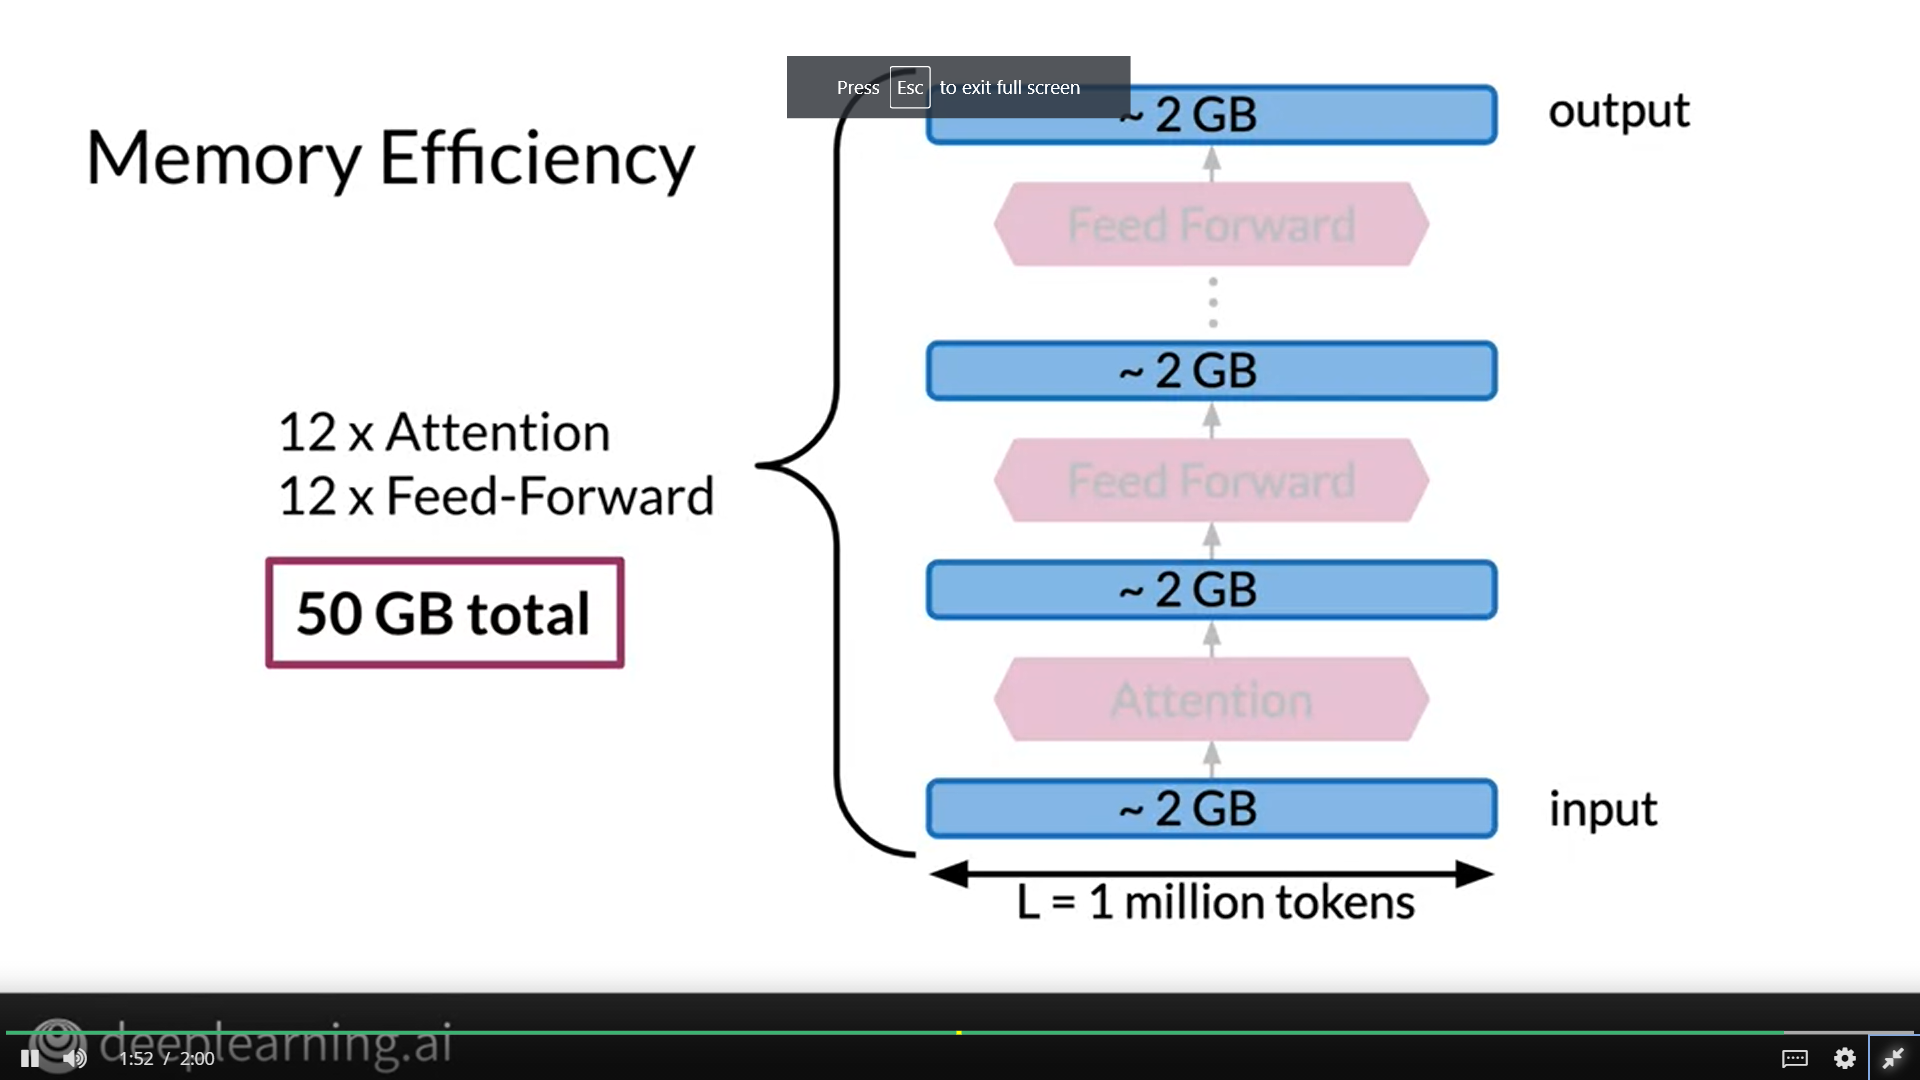

Already you can see an issue, saving these activations would use around 50 GB of memory, which wont fit on a single device. Keep in mind that the latest transformers are much deeper than the 12 layer design I'm using here. This is the first fundamental efficiency challenge, transformers phase. Memory usage also grows linearly with the number of layers, so there's no way to scale to the million token regime. Fortunately, there is a solution where you don't need to save anything for the backward path, and I'll show you that next.

# Reversible Residual Layers

The second novel approach implemented in Reformer is to recompute the input of each layer on-demand during back-propagation, rather than storing it in memory. This is accomplished by using `reversible layers`, where activations from the last layer of the network are used to recover activations from any intermediate layer, by what amounts to running the network in reverse.

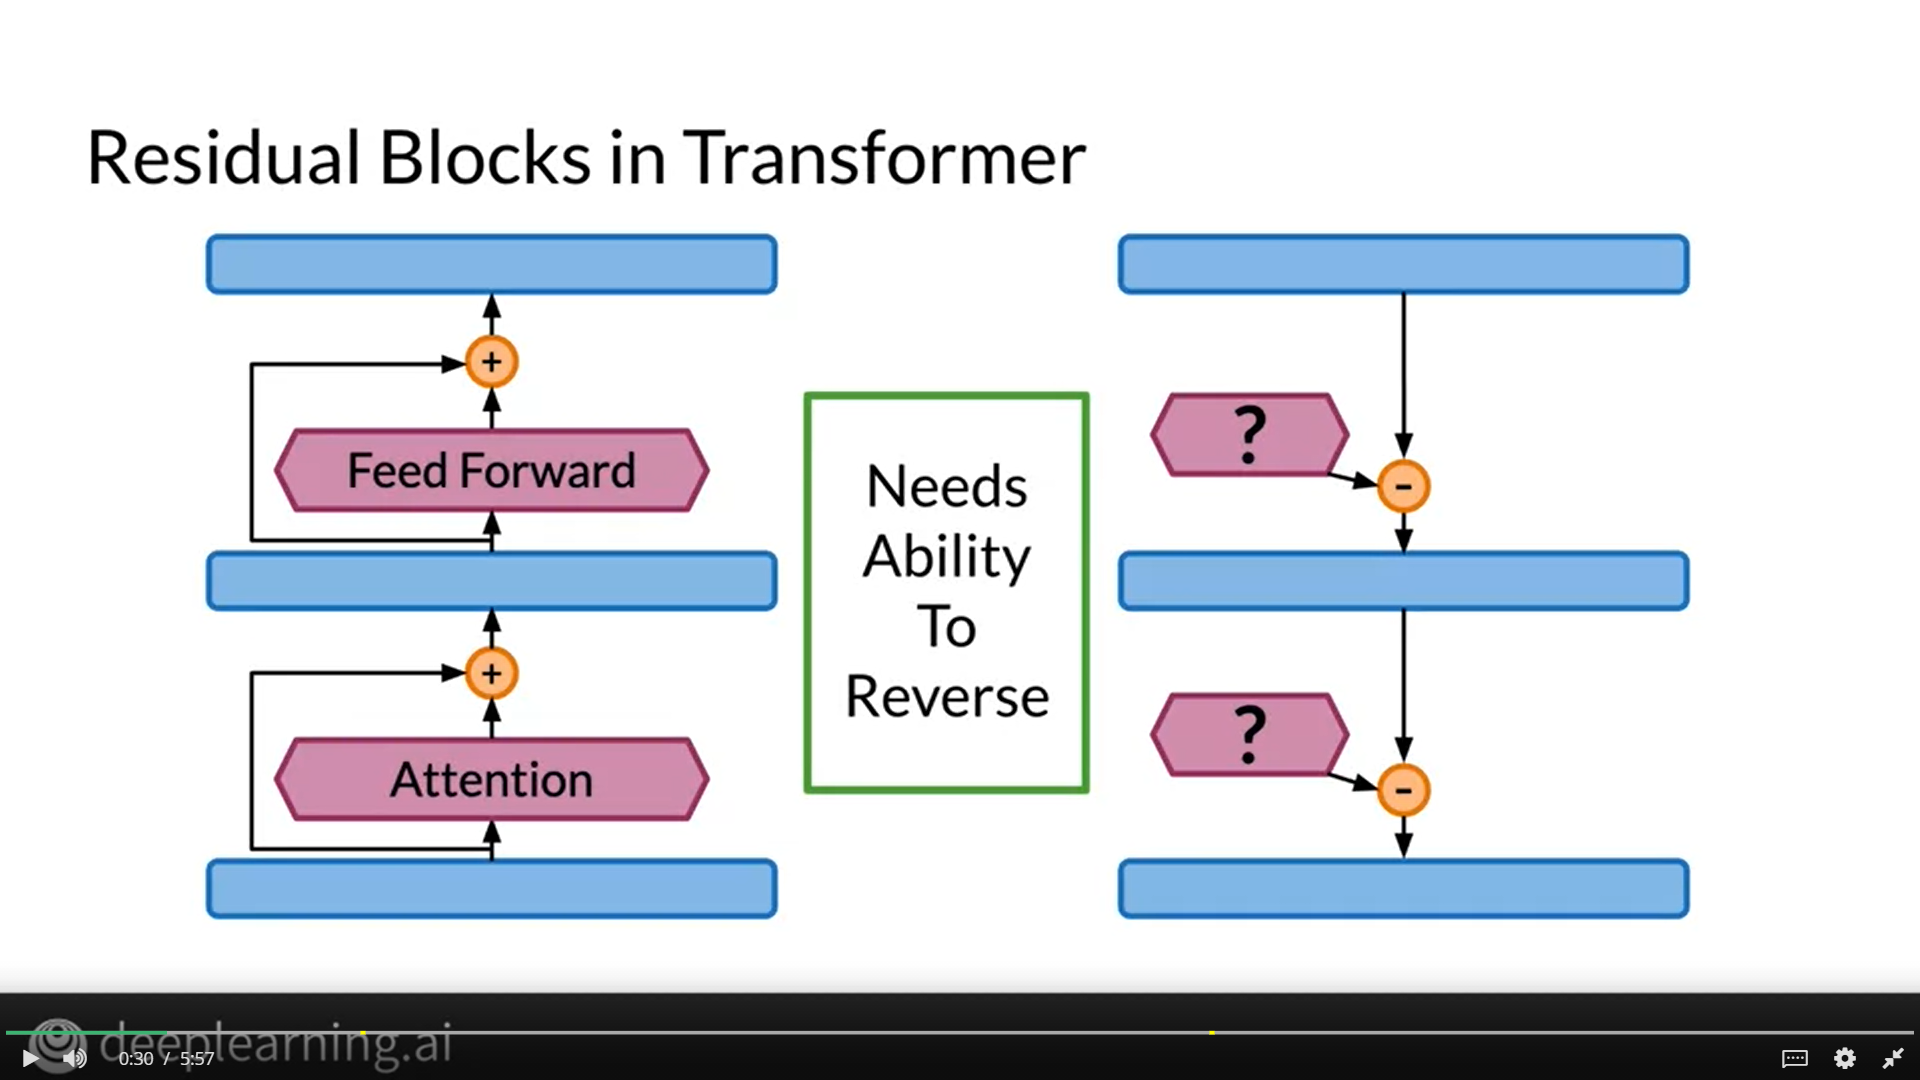

When running large deep models, you'll often run out of memory as each layer keeps allocating it for a long time. I'll show you how this can be solved using reversible layers, let's dive in. The transformer network precedes by repeatedly adding residuals to the hidden states. To run it in reverse, you can subtract the residuals in the opposite order, starting with the outputs of the model. But in order to save memory otherwise used to store the residuals, you need to be able to recompute them quickly instead, and this is where reversible residual connections come in. 

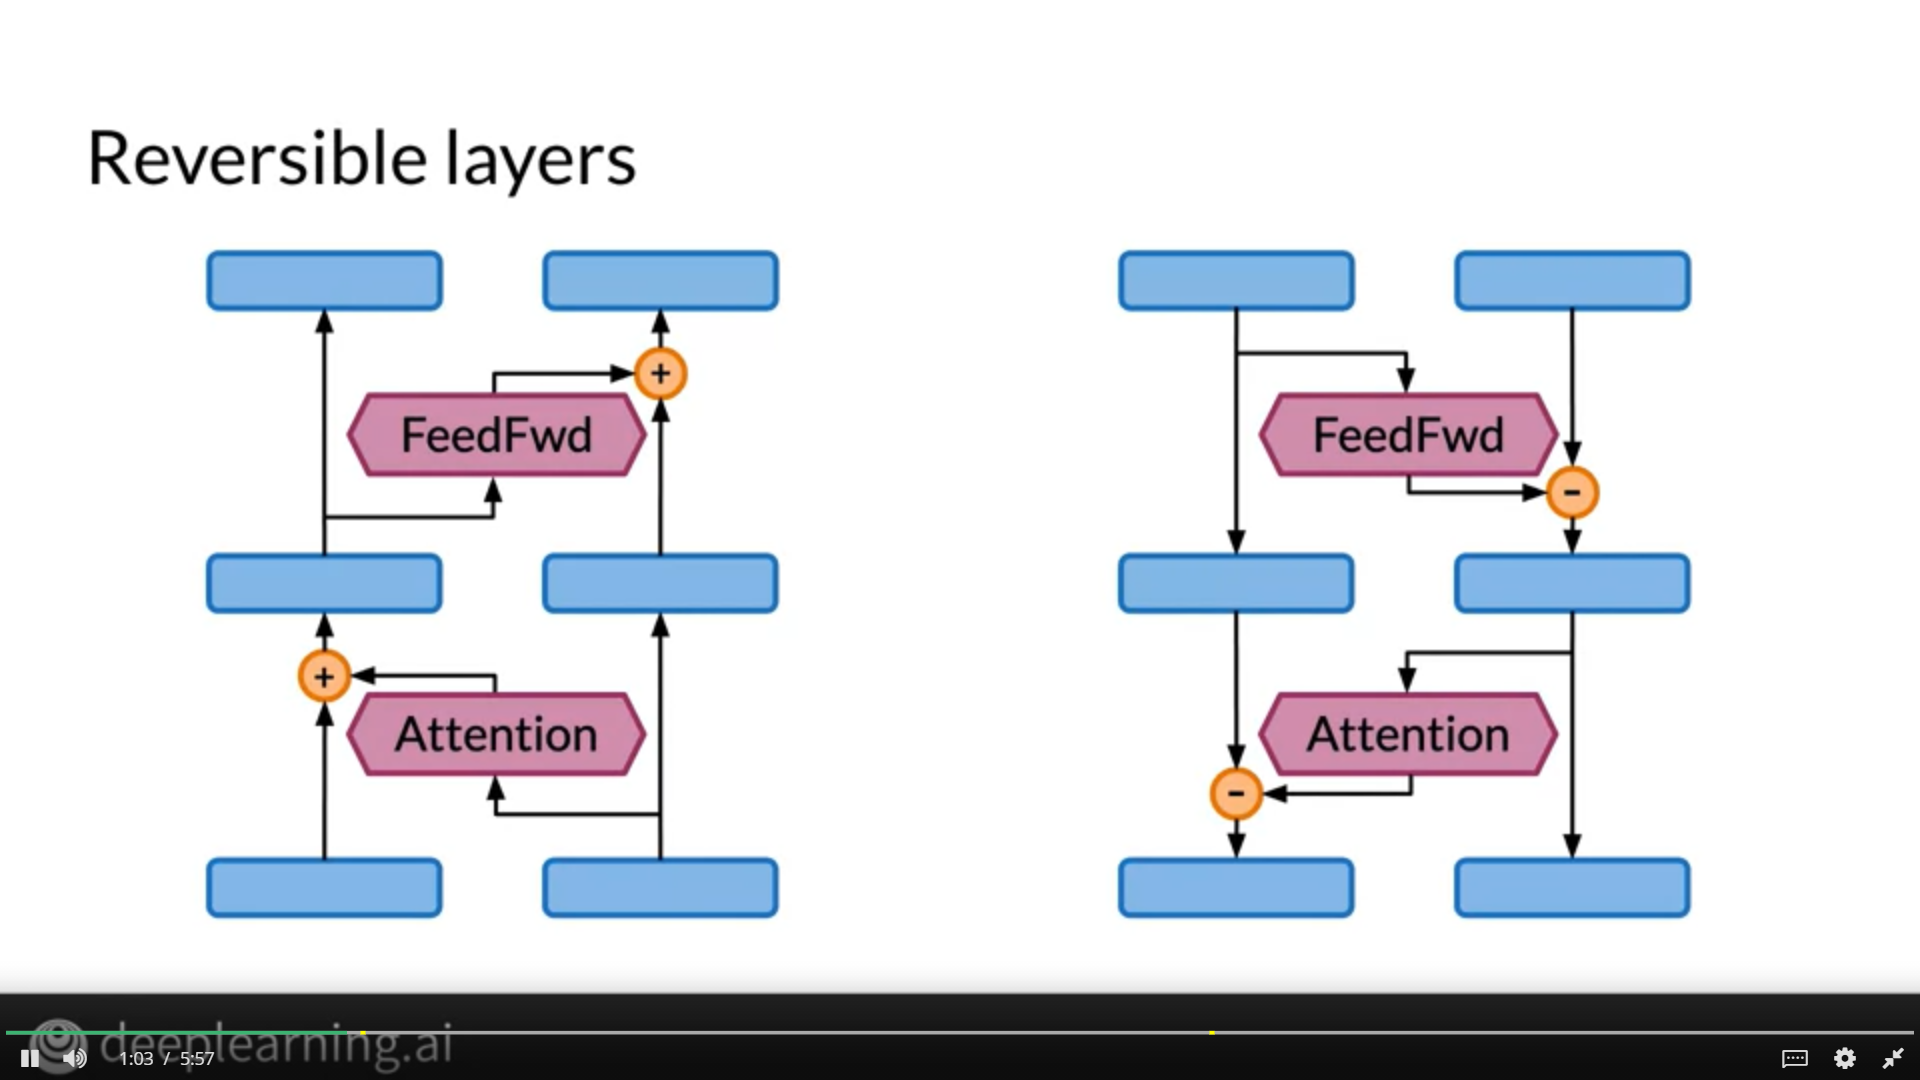

`The key idea is that you start with two copies of the model inputs, then at each layer you only update one of them.`<br>
The activations that you don't update will be the ones used to compute the residuals, where this configuration you can now run the network in reverse. Layer 1 is attention and layer 2 is feedforward. The activations in the model are now twice as big, but you don't have to worry about caching for the backwards pass. 

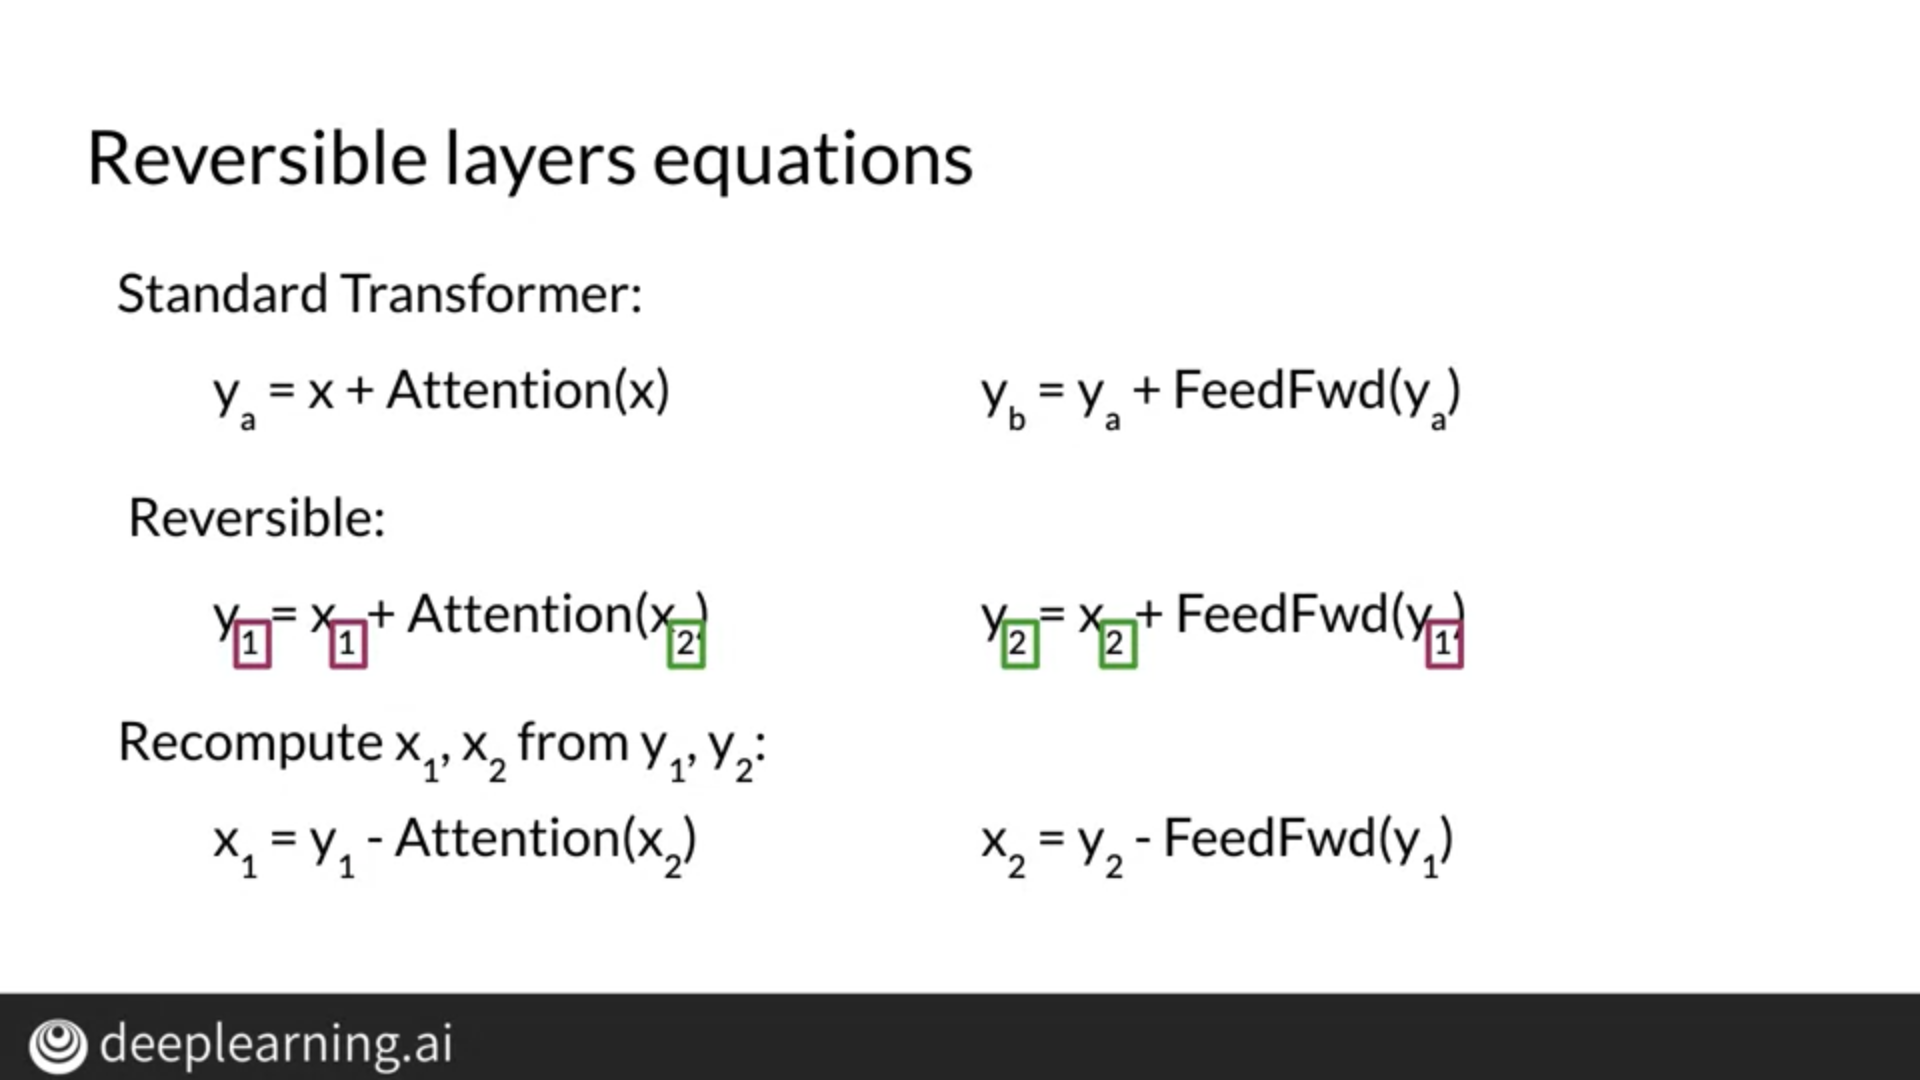

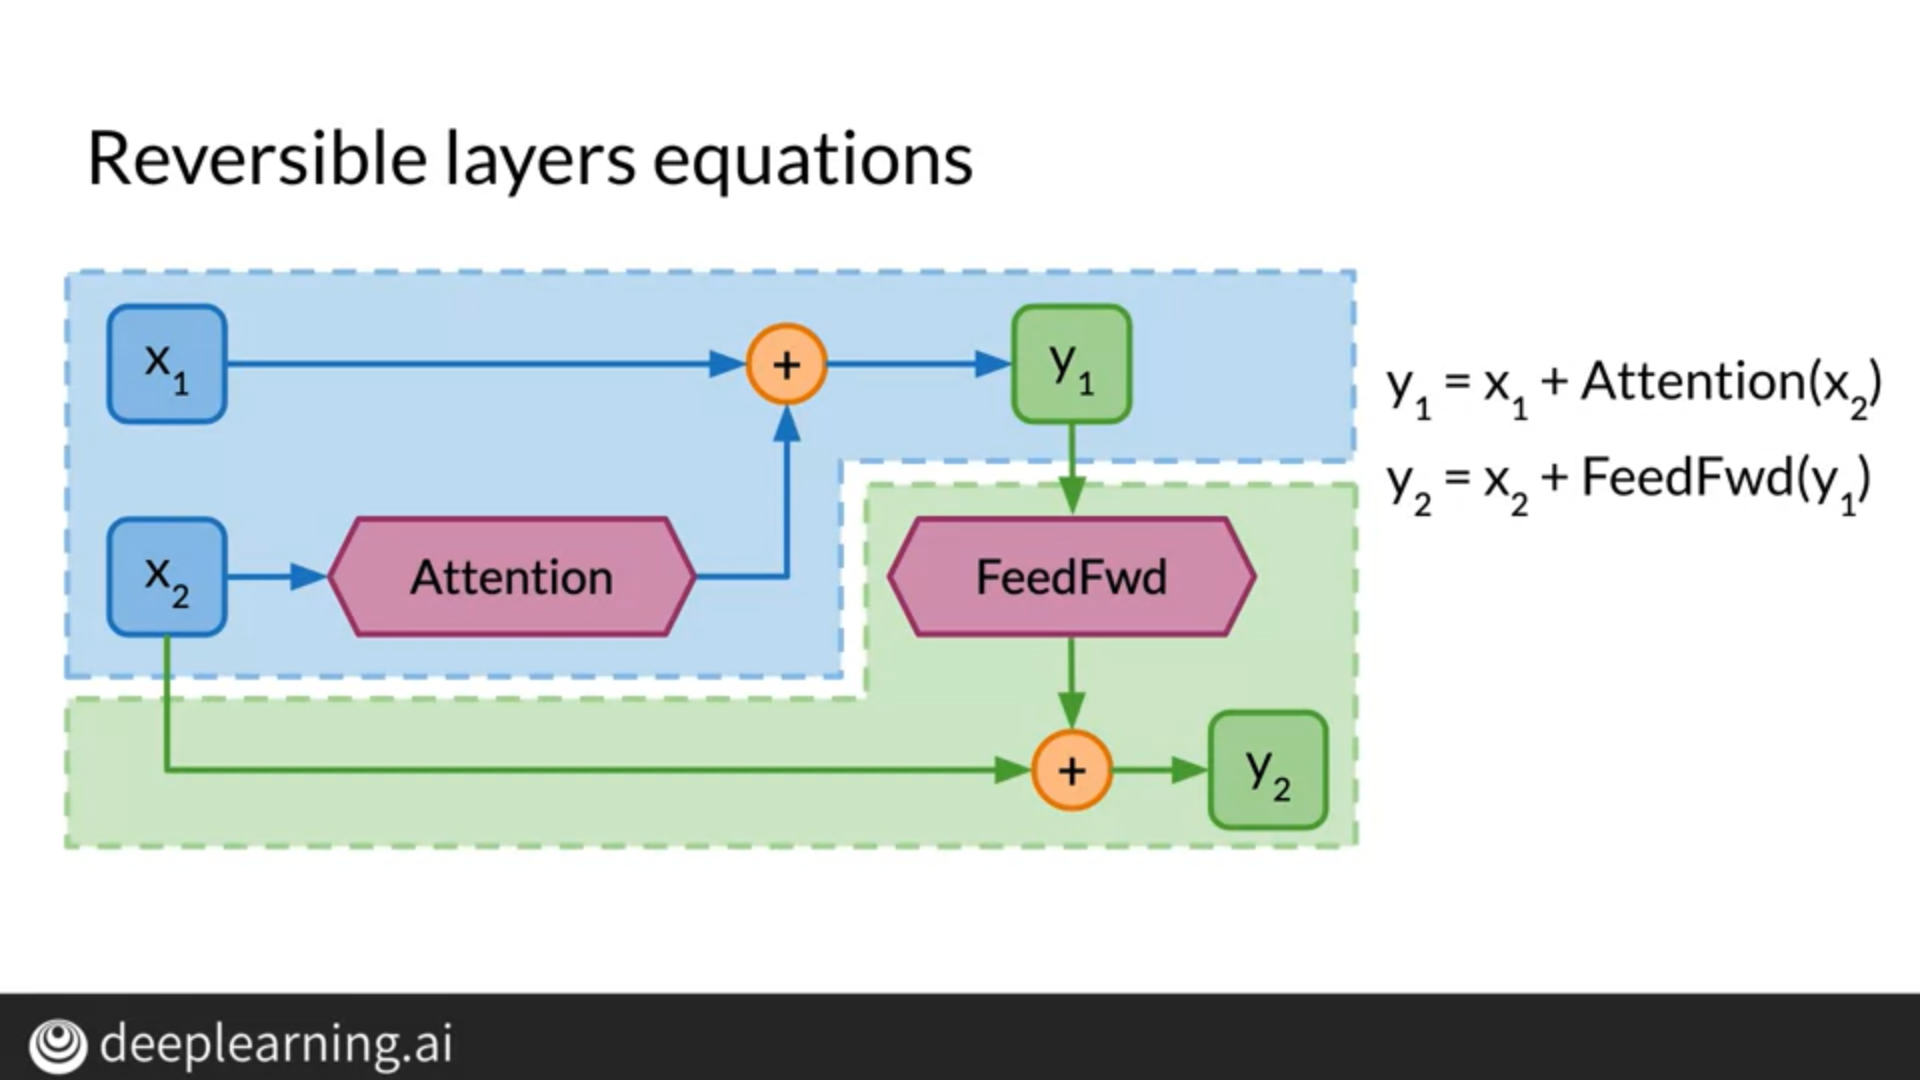

That's a forward pass for irreversible residual block. It's combined standard attention and feedforward residual layers from a regular transformer into a single reversible residual block, and there is nothing to be saved in memory except the Y_1 and Y_2 of the output layer instead of activations for every individual layer.

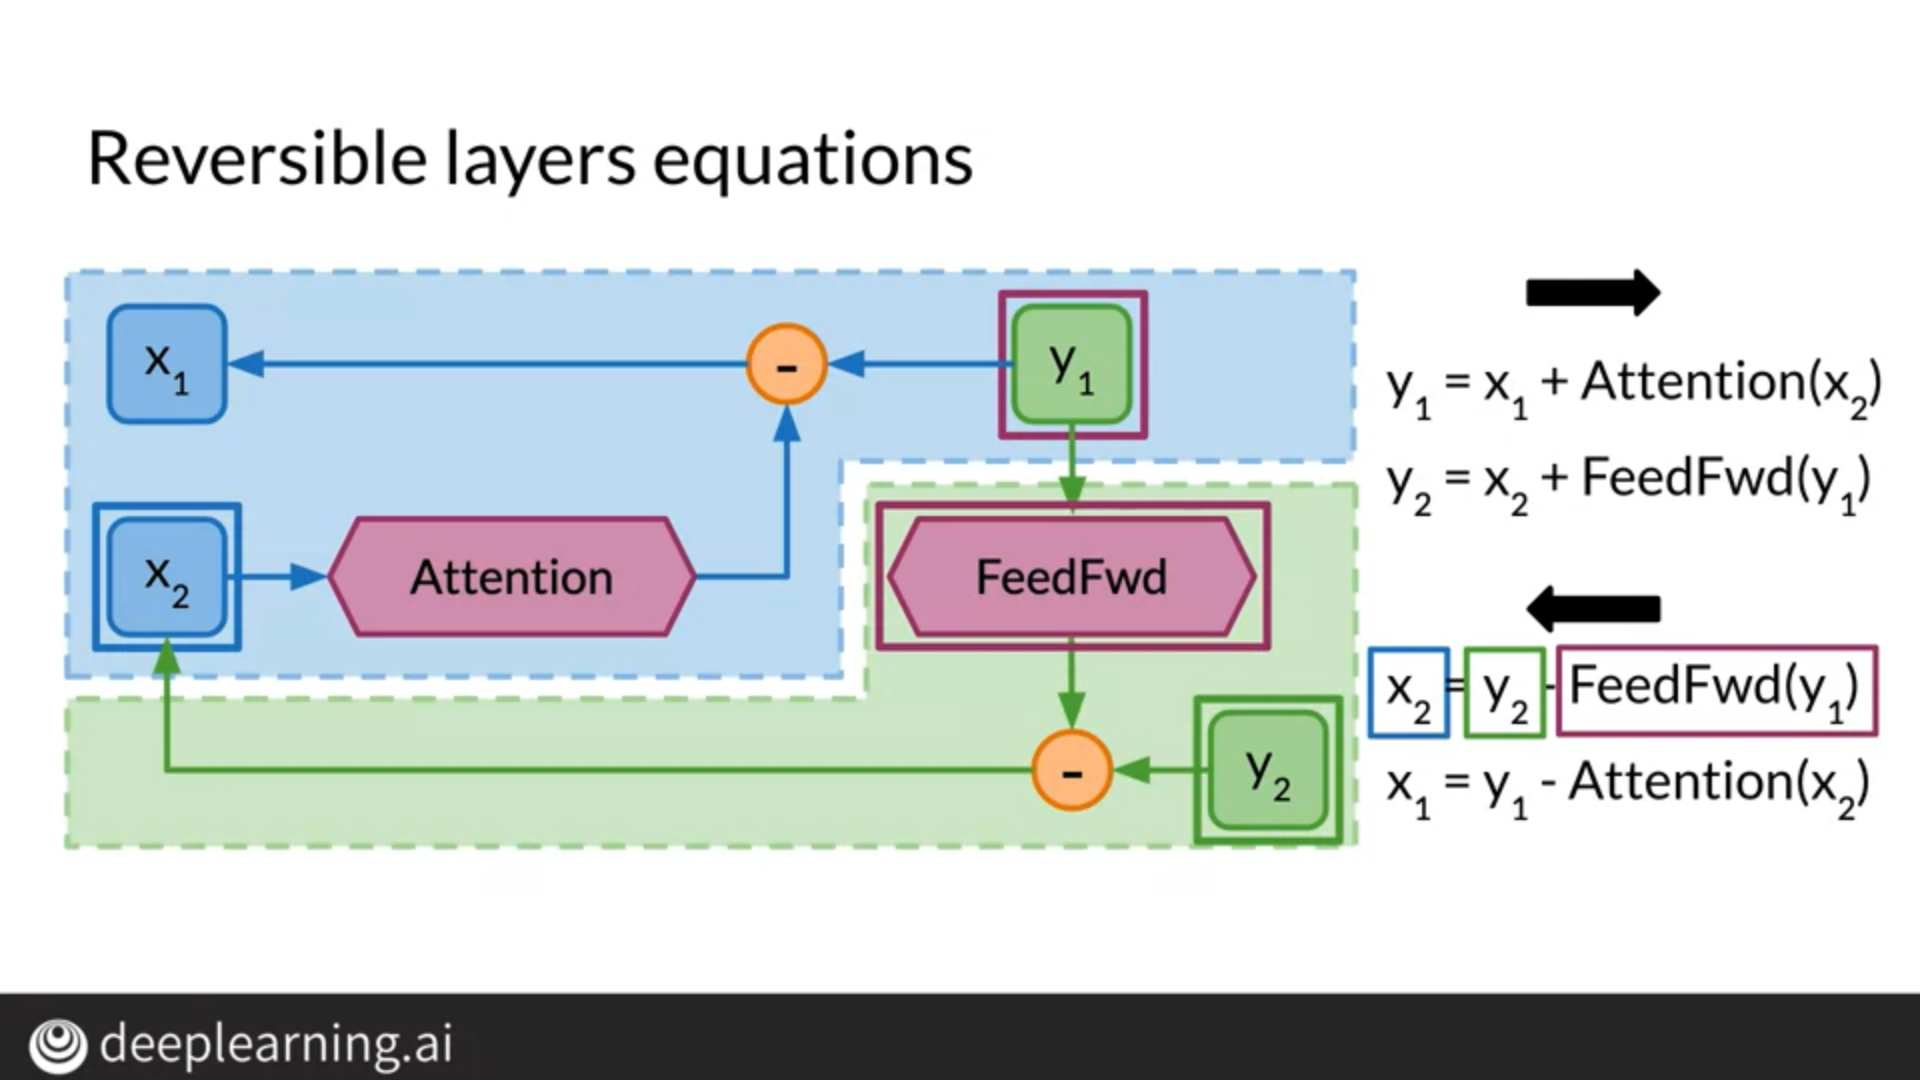

While the application of `Reformer` to imaging and video tasks shows great potential, its application to text is even more exciting. Reformer can process entire novels, all at once and on a single device. Processing the entirety of Crime and Punishment in a single training example is demonstrated in this colab. In the future, when there are more datasets with long-form text to train, techniques such as the Reformer may make it possible to generate long coherent compositions.


# Reformer

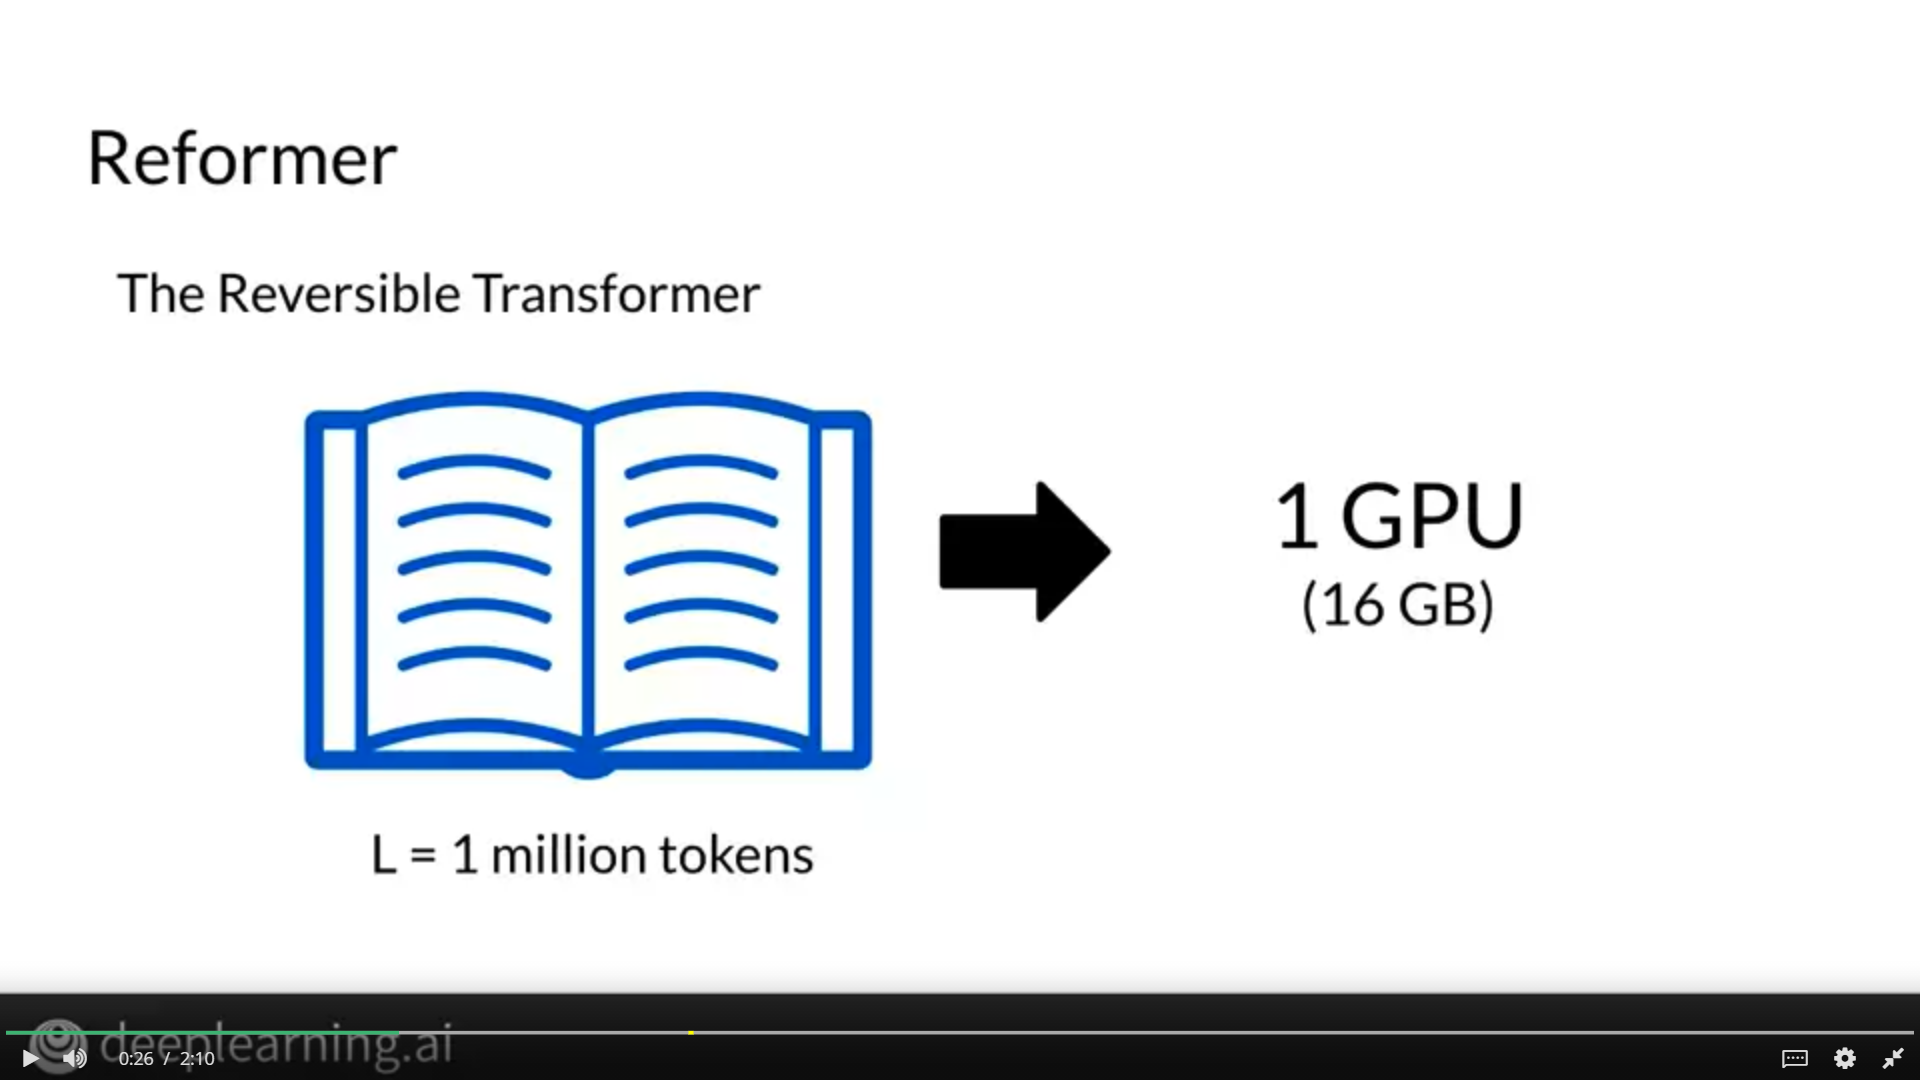

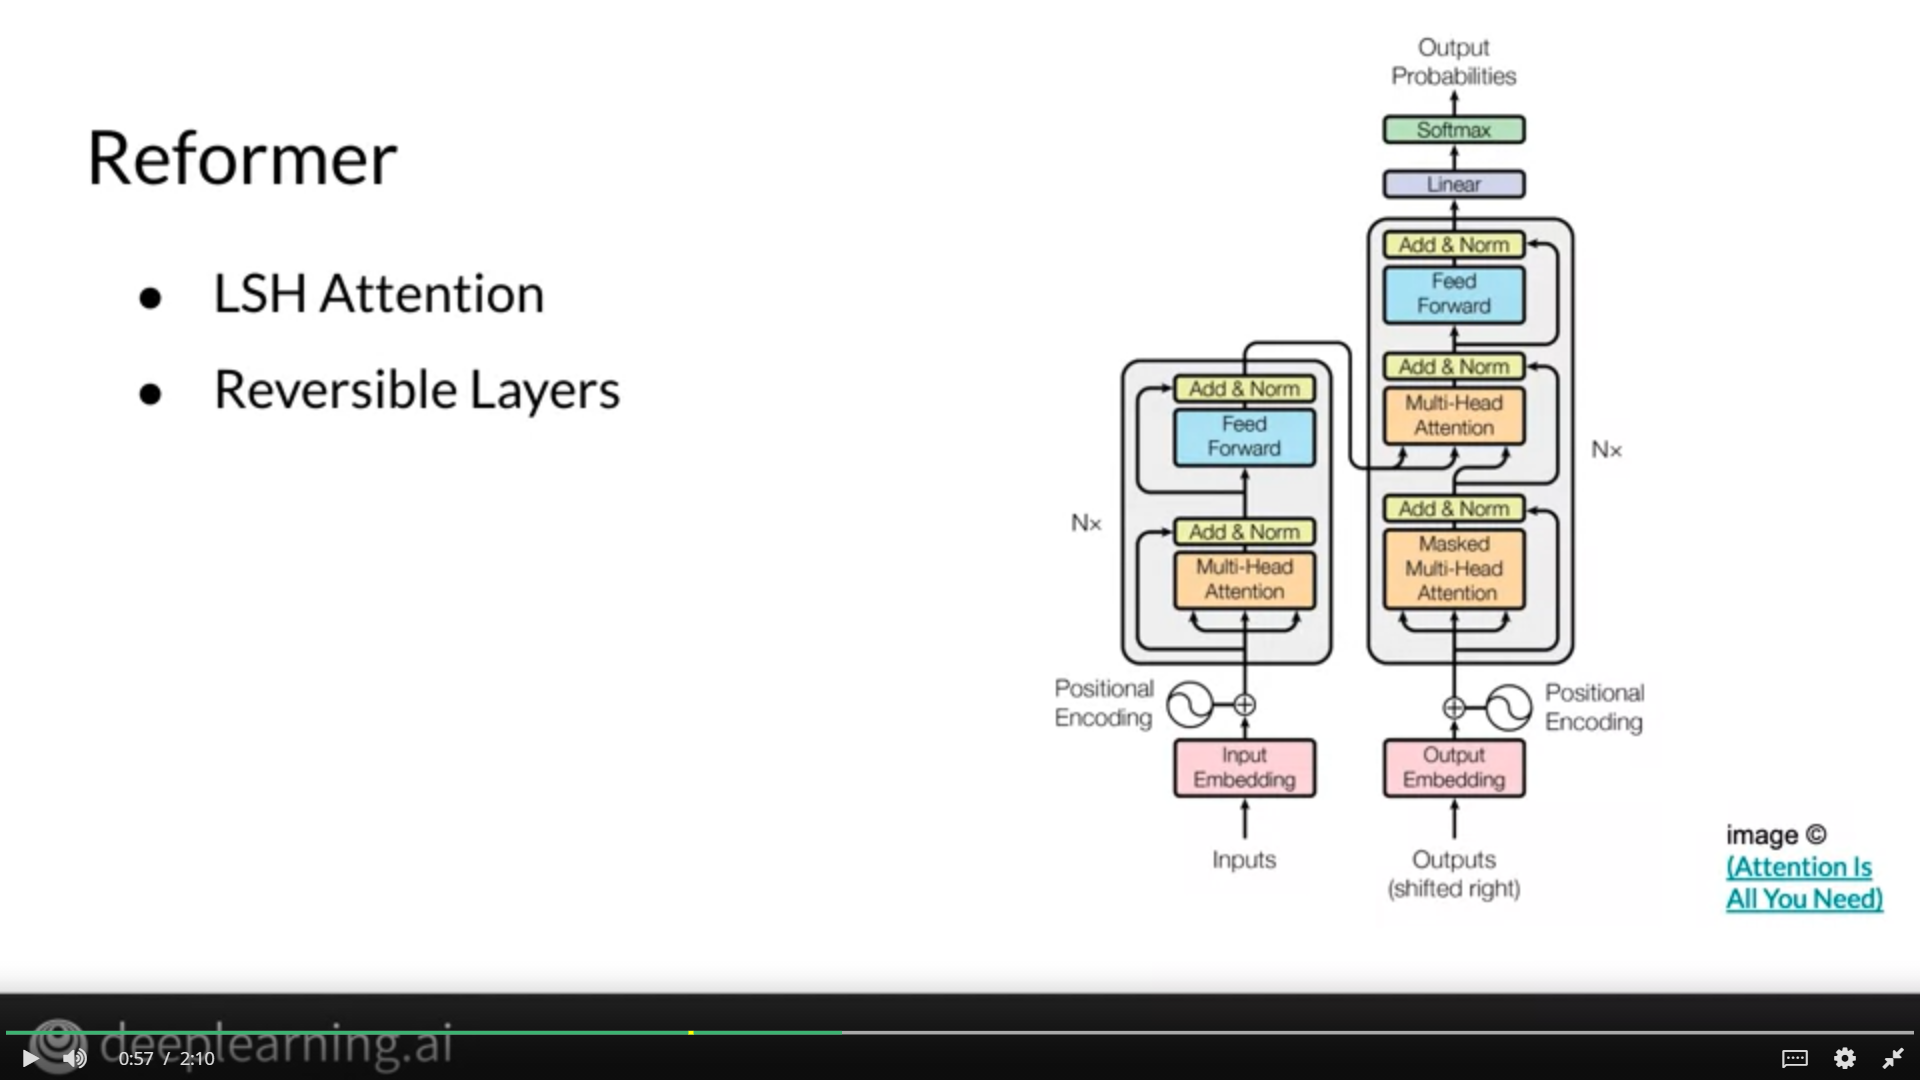

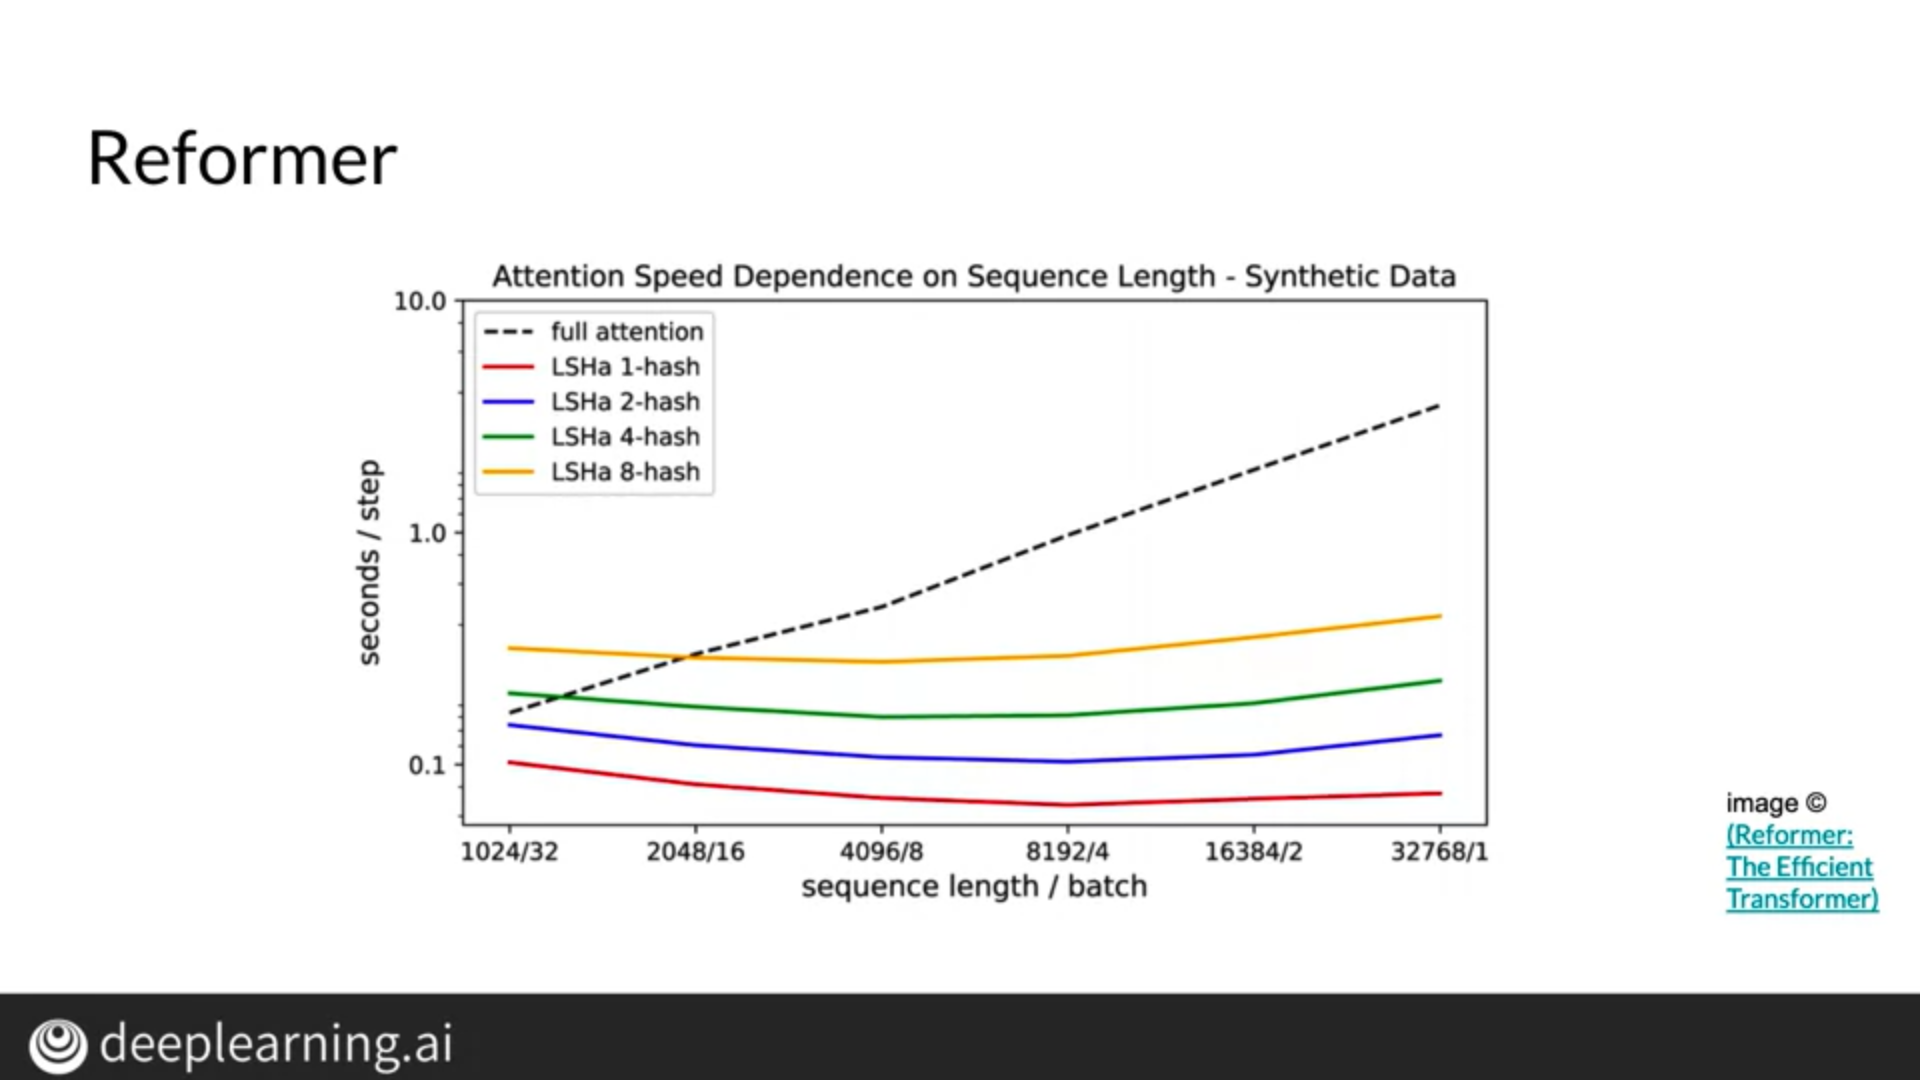

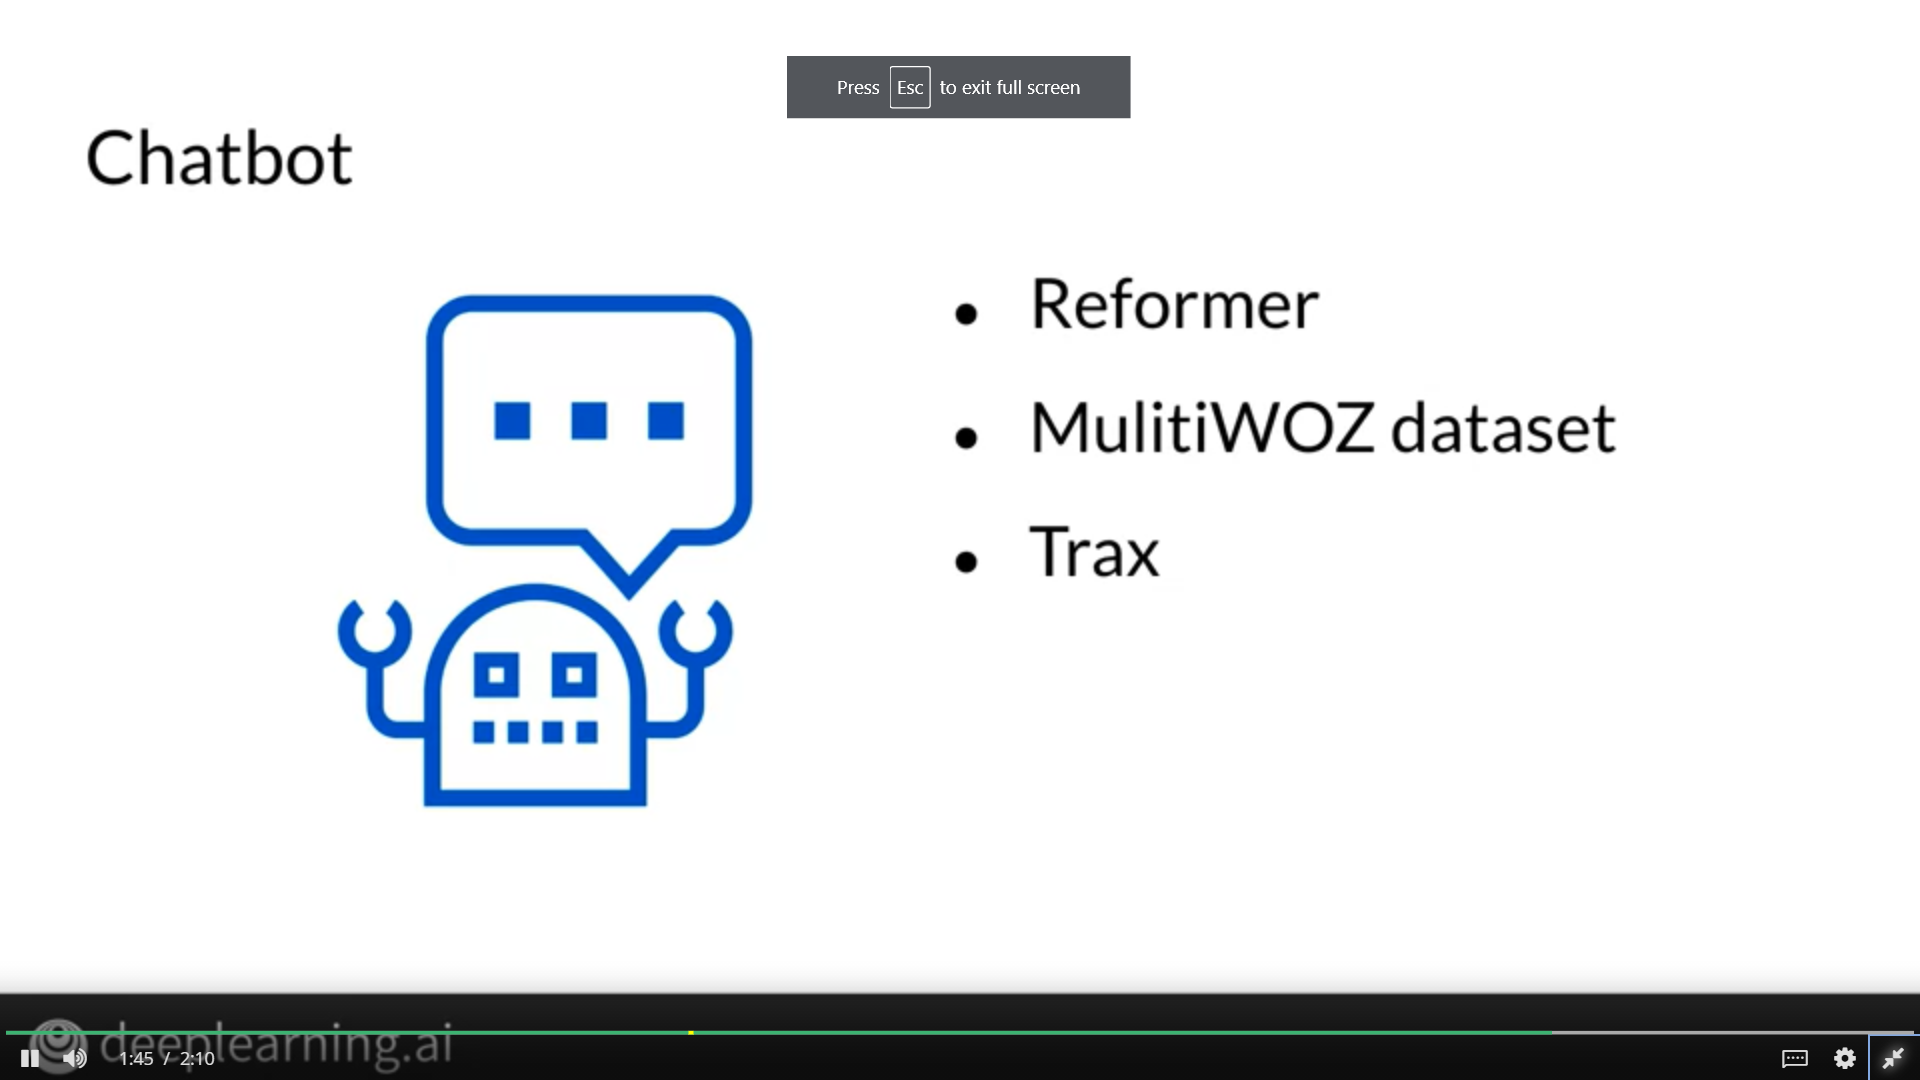